# Sprint 機械学習スクラッチ ロジスティック回帰

## 目的
・スクラッチを通してロジスティック回帰を理解する
・分類問題についての基礎を学ぶ

## ロジスティック回帰スクラッチ  

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。  
以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。  

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None, LAMBDA=1.0):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
       LAMBDA:float
           正則化パラメータ(default=1.0)
            
        """

        if not self.bias:
            #print("X.shape", X.shape)
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
            X_val = np.concatenate([np.ones((X_val.shape[0], 1)), X_val], axis=1)
            
        self.theta = np.array([np.random.rand() for i in range(X.shape[1])])

        
        for i in range(self.iter):
            #print("iter:", i)
            # 引数error どうする？
            self._gradient_descent(X, y, LAMBDA)
            
            # 目的関数（損失関数）の記録
            #print("self.loss[i]", self.loss[i])
            #print("self.J(X, y, LAMBDA) ", self.J(X, y, LAMBDA))
            self.loss[i] = self.J(X, y, LAMBDA) 
            
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self.J(X_val, y_val, LAMBDA) 
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("iter:", i)
                print("theta", self.theta)


    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
            
        threshold:float
            しきい値(default:0.5)

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        #biasの扱いがよく分からない
        """
        if not self.bias:
            result = (self.predict_proba(X) >= threshold + 1).astype(np.int)
        else:
            result = (self.predict_proba(X) >= threshold).astype(np.int)
        """
        result = (self.predict_proba(X) >= threshold).astype(np.int)
        return result 

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        #print(self.bias)
        if not self.bias:
            #print("X.shape", X.shape)
            X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
            
        return self._logistic_hypothesis(X)
    
    #【問題1】仮定関数
    def _logistic_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        学習データ

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果

        """
        return 1/(1+ np.exp(-np.dot(X, self.theta.T)))
    
    # 【問題2】最急降下法
    def _gradient_descent(self, X, y, LAMBDA, error=0):
        """
        最急降下法より学習させる
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        学習データ
        
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        
        error:i今のところ、使用していない        

        Returns
        -------
        なし
        """
        #print("X.shape", X.shape)
        #print("np.dot(self._linear_hypothesis(X) - y , X)" , np.dot(self._linear_hypothesis(X) - y , X))
        # パラメータを更新
        # X.shapeの方が良い？

        #print("パラメータ更新前:{}".format(self.theta))
        #self.theta = self.theta - (self.lr /X.shape[0] * (np.dot((self._logistic_hypothesis(X) - y) + (LAMBDA * np.hstack([0, np.square(self.theta[1:])])).T)))
        #self.theta = self.theta - (self.lr /X.shape[0] * (np.dot((self._logistic_hypothesis(X) - y)))) 
        #theta_copy = self.theta
        #print("勾配",self.lr /X.shape[0] * ((np.dot(X.T, self._logistic_hypothesis(X) - y))))
        #print("正則化", LAMBDA*np.hstack([0, theta_copy[1:]]))
        #print("np.dot(X.T, self._logistic_hypothesis(X) - y", np.dot(X.T, self._logistic_hypothesis(X) - y))
        
        # バイアス項は正則化しない
        if not self.bias:
            theta_copy = np.hstack([0, self.theta[1:]])
        else:
            theta_copy = self.theta
        
        self.theta = self.theta - (self.lr /X.shape[0] * ((np.dot(X.T, self._logistic_hypothesis(X) - y) + LAMBDA*theta_copy)))
        #print("パラメータ更新後:{}".format(self.theta))
        
        return
 

    def J(self, X, y, LAMBDA):
        """
        目的関数（損失関数）
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        学習データ
        
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値

        Returns
        -------
        float型
        目的関数による計算結果
        
        """
        #reg_term = LAMBDA * np.hstack([0, np.square(self.theta[1:])])
        #1/X.shape[0] * (np.dot(-y, np.log(self._logistic_hypothesis(X))) - np.dot((1 - y), np.log(1 - self._logistic_hypothesis(X)))) +  np.sum(reg_term /2*X.shape[0])
        
        #print("(-y*np.log(self._logistic_hypothesis(X))", (-y*np.log(self._logistic_hypothesis(X))))
        #print("((1 - y)*np.log(1 - self._logistic_hypothesis(X)))", ((1 - y)*np.log(1 - self._logistic_hypothesis(X))))
        #print("(LAMBDA/2*X.shape[0])*np.sum(np.square(self.theta[1:]))", (LAMBDA/2*X.shape[0])*np.sum(np.square(self.theta[1:])))
        #print("", )
              
        return 1/X.shape[0] * np.sum((-y*np.log(self._logistic_hypothesis(X))) - ((1 - y)*np.log(1 - self._logistic_hypothesis(X)))) +  (LAMBDA/(2*X.shape[0]))*np.sum(np.square(self.theta[1:]))

    def to_matrix(x):
        x3 = x[:, 0, np.newaxis] ** 2
        return np.hstack([x, x3])

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。  
ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。  
g
(
z
)
=
1
1
+
e
−
z
.
線形回帰の仮定関数は次の式でした。
h
θ
(
x
)
=
θ
T
⋅
x
.
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
h
θ
(
x
)
=
1
1
+
e
−
θ
T
⋅
x
.
x
 : 特徴量ベクトル
θ
 : パラメータ（重み）ベクトル

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
θ
j
:=
θ
j
−
α
∂
J
(
θ
)
∂
θ
j
∂
J
(
θ
)
∂
θ
0
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
,
j
=
0
∂
J
(
θ
)
∂
θ
j
=
(
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
)
+
λ
m
θ
j
　
,
j
≥
1
α
 : 学習率
i
 : サンプルのインデックス
j
 : 特徴量のインデックス
m
 : 入力されるデータの数
h
θ
(
)
 : 仮定関数
x
 : 特徴量ベクトル
θ
 : パラメータ（重み）ベクトル
x
(
i
)
 : i番目のサンプルの特徴量ベクトル
y
(
i
)
 : i番目のサンプルの正解ラベル
θ
j
 : j番目のパラメータ（重み）
λ
 : 正則化パラメータ

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。
仮定関数 
h
θ
(
x
)
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
なお、この数式には正則化項が含まれています。
＊数式が見切れる場合、DIVERを全画面にして御覧ください。
J
(
θ
)
=
1
m
m
∑
i
=
1
 
[
−
y
(
i
)
l
o
g
(
h
θ
(
x
(
i
)
)
)
−
(
1
−
y
(
i
)
)
l
o
g
(
1
−
h
θ
(
x
(
i
)
)
)
]
+
λ
2
m
n
∑
j
=
1
 
θ
2
j
.
m
 : 入力されるデータの数
h
θ
(
)
 : 仮定関数
x
 : 特徴量ベクトル
θ
 : パラメータ（重み）ベクトル
x
(
i
)
 : i番目のサンプルの特徴量ベクトル
y
(
i
)
 : i番目のサンプルの正解ラベル
θ
j
 : j番目のパラメータ（重み）
n
 : 特徴量の数
λ
 : 正則化パラメータ


## 検証

### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
df = pd.concat([X, y], axis=1)

df_selected = df.query("Species == [1, 2]").loc[:, ["sepal_length", "petal_length", "Species"]]
df_selected.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [4]:
df_selected = df.loc[:, ["sepal_length", "petal_length", "Species"]].query("Species == [1, 2]")
df_selected.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [5]:
X_train, X_test, y_train_pre, y_test_pre = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "Species"], test_size=0.25, random_state=42)

print("X_train.shape : {}, X_test.shape : {}".format(X_train.shape, X_test.shape))

X_train.shape : (75, 2), X_test.shape : (25, 2)


In [6]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

#正解ラベルを0,1にする
y_train = y_train_pre-1
y_test = y_test_pre-1

scratch_logistic_reg = ScratchLogisticRegression(3000, 0.01, False, False)
scratch_logistic_reg.fit(X_train_transformed, y_train, X_test_transformed, y_test, 0.1)

y_pred_proba = scratch_logistic_reg.predict_proba(X_test_transformed)
y_pred = scratch_logistic_reg.predict(X_test_transformed)

In [7]:
def evaluate(y_true, y_pred):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

In [8]:
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
print("y_pred_proba 推定結果：\n{}".format(y_pred_proba))
print("y_pred 推定結果：\n{}".format(y_pred))

acc : 0.84
precision : 0.8181818181818182
recall : 0.8181818181818182
f1 : 0.8181818181818182
confusion matrix 
 [[12  2]
 [ 2  9]]
y_pred_proba 推定結果：
[0.68508216 0.93215074 0.94948485 0.07691789 0.07757312 0.03902349
 0.5100075  0.98740856 0.00668752 0.31831969 0.19385466 0.01905891
 0.5100075  0.69100134 0.92978789 0.25272386 0.42082981 0.51460099
 0.0373359  0.01326106 0.99794754 0.42531729 0.40744843 0.03800235
 0.60735534]
y_pred 推定結果：
[1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1]


### scikit-learn

In [9]:
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs')
logistic_reg.fit(X_train_transformed, y_train)
y_pred_proba_sl = logistic_reg.predict_proba(X_test_transformed)
y_pred_sl = logistic_reg.predict(X_test_transformed)

In [10]:
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_sl)))
print("y_pred_proba_sl 推定結果：{}".format(y_pred_proba_sl))
print("y_pred_sl 推定結果：{}".format(y_pred_sl))

acc : 0.84
precision : 0.8181818181818182
recall : 0.8181818181818182
f1 : 0.8181818181818182
confusion matrix 
 [[12  2]
 [ 2  9]]
y_pred_proba_sl 推定結果：[[0.30764419 0.69235581]
 [0.05559464 0.94440536]
 [0.05362308 0.94637692]
 [0.92137205 0.07862795]
 [0.91683684 0.08316316]
 [0.95881557 0.04118443]
 [0.49934223 0.50065777]
 [0.01502866 0.98497134]
 [0.99233878 0.00766122]
 [0.77433891 0.22566109]
 [0.82540531 0.17459469]
 [0.98122293 0.01877707]
 [0.49934223 0.50065777]
 [0.27008507 0.72991493]
 [0.06988728 0.93011272]
 [0.79120096 0.20879904]
 [0.58434107 0.41565893]
 [0.4688767  0.5311233 ]
 [0.96931146 0.03068854]
 [0.98738814 0.01261186]
 [0.00227853 0.99772147]
 [0.55443255 0.44556745]
 [0.66966927 0.33033073]
 [0.96546623 0.03453377]
 [0.35665126 0.64334874]]
y_pred_sl 推定結果：[1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1]


In [11]:
print("y_pred 推定結果：{}".format(y_pred))
print("y_pred_sl 推定結果：{}".format(y_pred_sl))

y_pred 推定結果：[1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1]
y_pred_sl 推定結果：[1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1]


### 【問題7】学習曲線のプロット

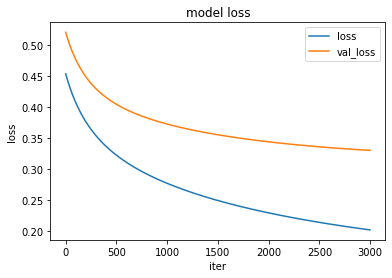

In [12]:
#plt.figure(figsize=(15,10))
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(scratch_logistic_reg.loss, label="loss")
plt.plot(scratch_logistic_reg.val_loss, label="val_loss")
plt.legend()
plt.show()

### 【問題8】決定領域の可視化
決定領域を可視化してください。

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

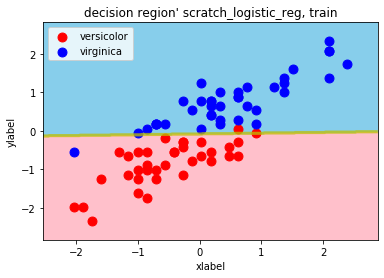

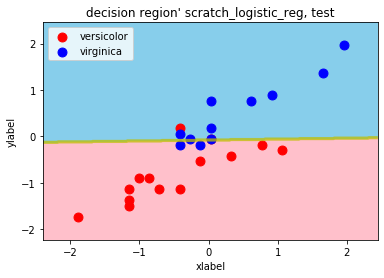

In [14]:
model = scratch_logistic_reg
model_name = "scratch_logistic_reg"
decision_region(X_train_transformed, y_train, model, title="decision region' {}, {}".format(model_name, "train"))
decision_region(X_test_transformed, y_test, model, title="decision region' {}, {}".format(model_name, "test"))